# Aeration Example Code

In [1]:
!pip install aguaclara

     |████████████████████████████████| 92kB 3.0MB/s 
     |████████████████████████████████| 163kB 8.5MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.2.0-cp36-none-any.whl size=99623 sha256=3932483efca8bc9b126812b19c914e80ba920194be2d9154854a10551849d3a0
  Stored in directory: /root/.cache/pip/wheels/34/e9/34/0d3722243083a982623290c205c14a08b54ed290ee29219fd2
  Created wheel for pint: filename=Pint-0.8.1-py2.py3-none-any.whl size=134156 sha256=731d04257c2d9ea6edef0b9258d1cd940ccd7320ef8944fc8b51767c658e65bb
  Stored in directory: /root/.cache/pip/wheels/b4/56/36/7c4d6a4e3660e233b95e3b0482551915cb184abca0f93ee1dd
Successfully built aguaclara pint


In [0]:
from aguaclara.core.units import unit_registry as u
import aguaclara as ac
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections


In [16]:
def aeration_data(DO_column, dirpath):
    """This function extracts the data from a folder containing tab delimited
    files of aeration data. The files must be the original tab delimited file.
    The names of the files must be listed in a text file called metadata.txt.

    Parameters
    ----------
    DO_column : int
        index of the column that contains the dissolved oxygen concentration
        data.
    dirpath : string
        path to the directory containing aeration data you want to analyze
    Returns
    -------
    filepaths : string list
        all file paths in the directory sorted by flow rate
    airflows : air flow rates in micromol/s (from the metafile)
    time_data : numpy array list
        sorted list of numpy arrays containing the times with units of seconds
    DO_data : dissolved oxygen concentrations (mg/L)    
    Examples
    --------
    """
    #return the list of files in the directory
    metadata = pd.read_csv(dirpath + '/metadata.txt', delimiter='\t')
    filenames = metadata['file name']
    #print(filenames)
    airflows = np.array(metadata['flow (micromol/s)']) * u.umol/u.s
    #print(airflows.magnitude)
    #extract the flowrates from the filenames and apply units
    #sort airflows and filenames so that they are in ascending order of flow rates
    filepaths = [dirpath + '/' + i for i in filenames]
    #C_data is a list of numpy arrays. Thus each of the numpy data arrays can have different lengths to accommodate short and long experiments
    # cycle through all of the files and extract the column of data with oxygen concentrations and the times
    time_data=[(ac.column_of_time(i,1,-1)).to(u.s) for i in filepaths]
    print(time_data)
    #DO_data=[ac.column_of_data(i,1,DO_column,-1,'mg/L') for i in filepaths]
    #aeration_collection = collections.namedtuple('aeration_results','metadata filenames airflows DO_data time_data')
    #aeration_results = aeration_collection(metadata, filenames, airflows, DO_data, time_data)
    #return aeration_results
    return time_data


DO_column = 2
dirpath = "https://raw.githubusercontent.com/monroews/CEE4530/master/Examples/data/Aeration_2020"
#metadata, filenames, airflows, DO_data, time_data = aeration_data(DO_column,dirpath)
time_data = aeration_data(DO_column,dirpath)

[<Quantity([  0.           4.99963104  10.00026432  14.99989536  19.99950048
  25.00012512  29.99975616  34.99942176  40.0000464   44.99964288
  50.00126976  54.9999072   59.99953824  65.00019744  69.99979392
  74.99945952  80.00105184  84.9997152   90.00033984  94.99997952
  99.99960192 105.0002352  109.9998576  114.99949728 120.00013056
 124.99979616 129.99941856 135.0000432  139.99967424 145.00029888
 149.99992992 154.9995696  160.00019424 164.99983392 169.99945632
 175.0000896  180.00078336 184.9994208  190.00001952], 'second')>, <Quantity([  0.           4.99678848   9.99913248  14.9997312   19.99798848
  24.99968448  29.99693088  34.99814304  39.99674592  45.00023904
  49.99741632  54.99939744  59.99887296  64.99942848  69.99836832
  75.00061728  79.99834752  84.99921408  89.99856     95.00205312
  99.99988704 105.00160032 110.0005488  115.00212384 119.999664
 124.99951968 129.99624768 135.0035424  140.00300928 145.00124928
 150.00405984 155.00316384], 'second')>, <Quantity([  0.

In [12]:
print(time_data)

NameError: ignored

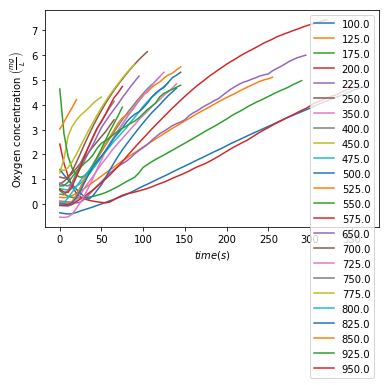

In [0]:
T# Plot the raw data
for i in range(airflows.size):
  plt.plot(time_data[i], DO_data[i],'-');
plt.xlabel(r'$time (s)$');
plt.ylabel(r'Oxygen concentration $\left ( \frac{mg}{L} \right )$');
plt.legend(airflows.magnitude);
plt.show()

#delete data that is less than 2 or greater than 6 mg/L
DO_min = 2 * u.mg/u.L
DO_max = 6 * u.mg/u.L
for i in range(airflows.size):
  idx_start = (np.abs(DO_data[i]-DO_min)).argmin()
  idx_end = (np.abs(DO_data[i]-DO_max)).argmin()
  time_data[i] = time_data[i][idx_start:idx_end] - time_data[i][idx_start]
  DO_data[i] = DO_data[i][idx_start:idx_end]
